In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### 8. This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US.

In [2]:
# 8.a read the data
college = pd.read_csv('../datasets/College.csv')
college.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [3]:
# 8.b remove first column
college = college.drop(columns='Unnamed: 0')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# 8.c.i produce a numerical summary of the variables in the data set.
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


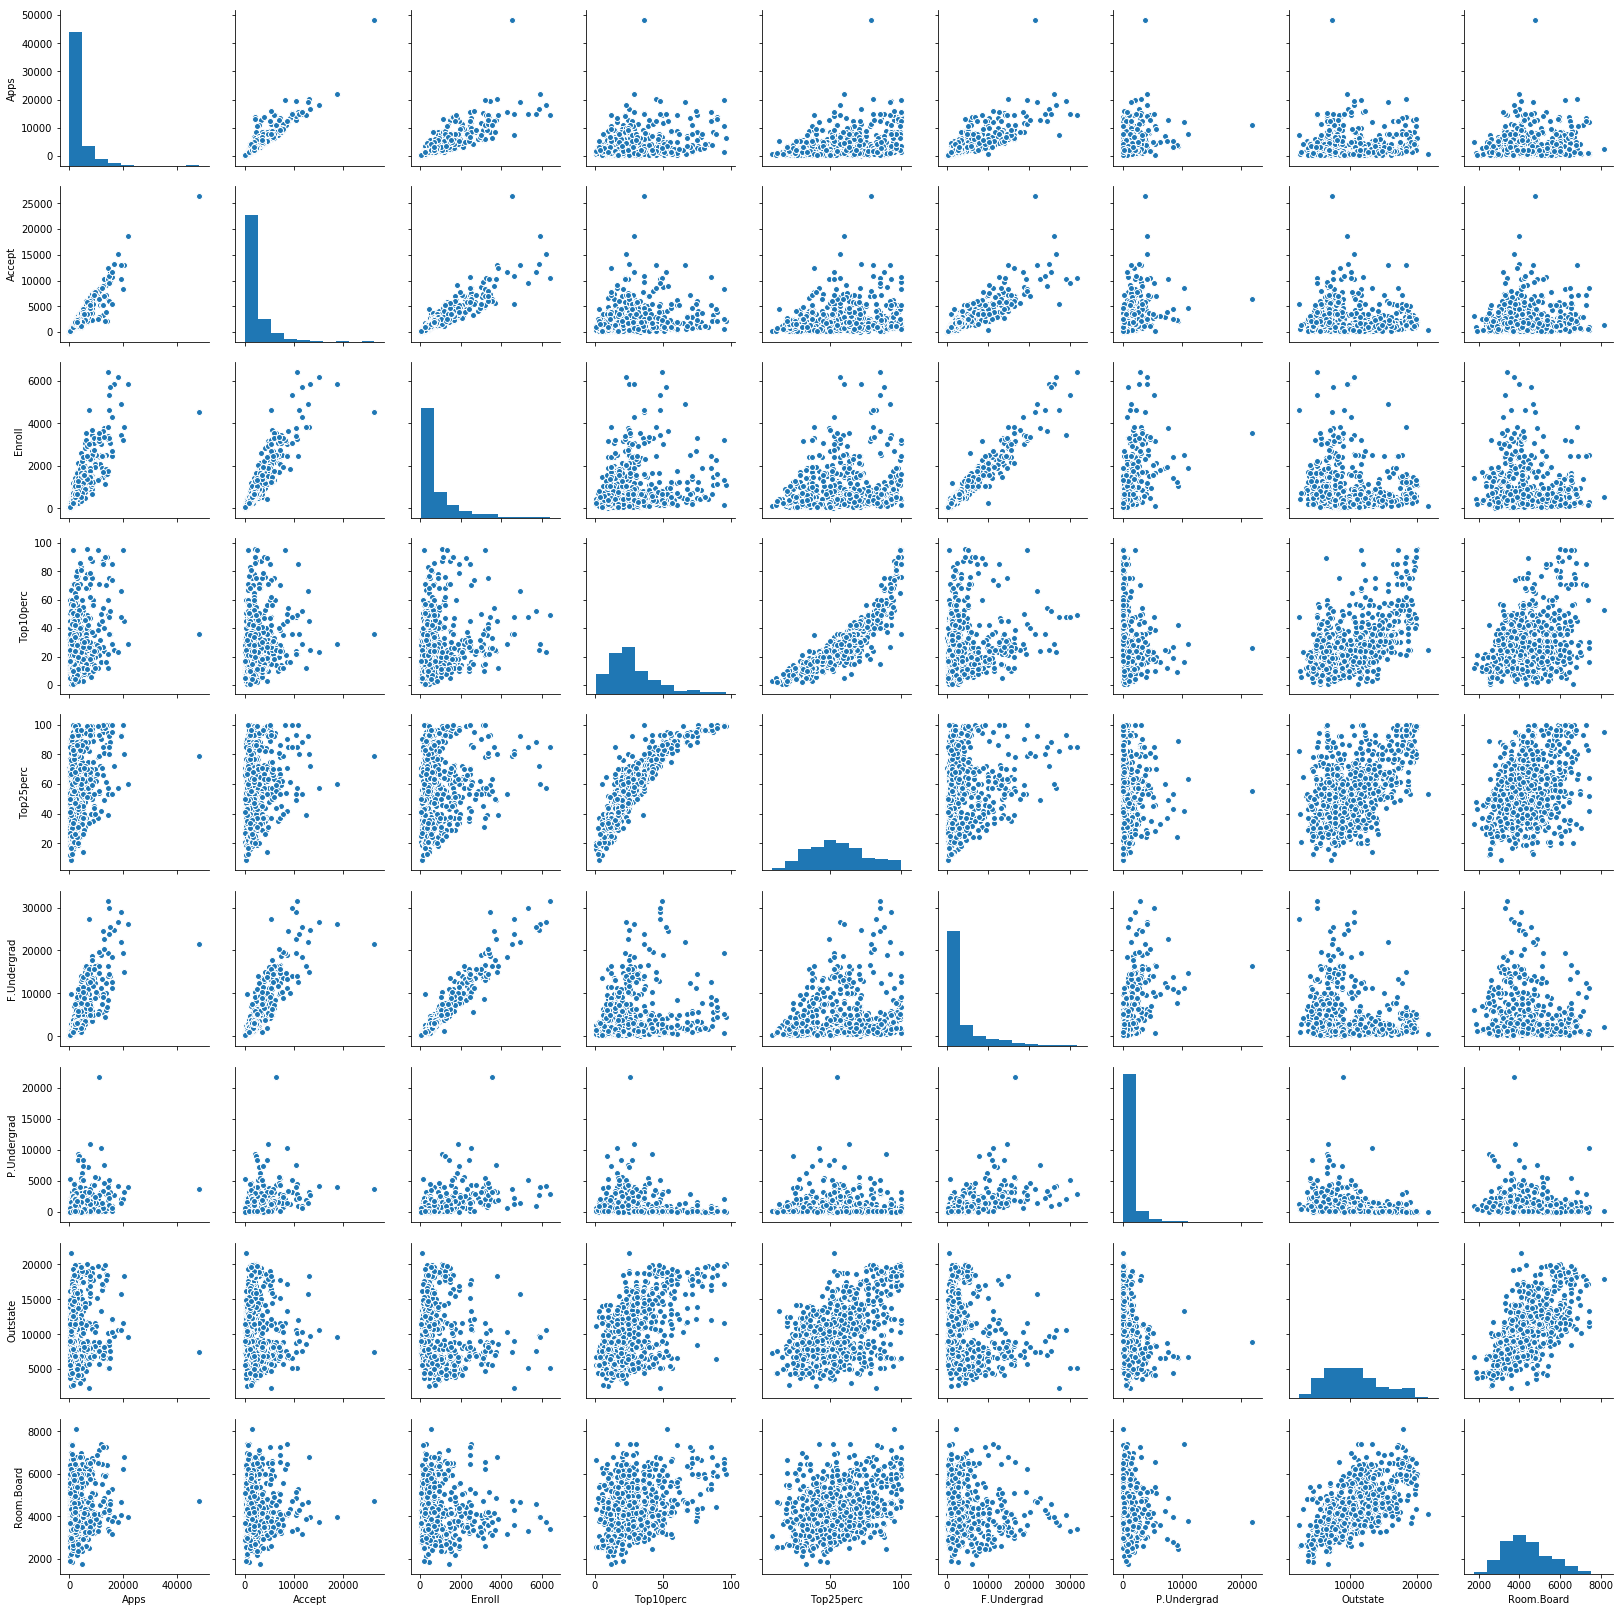

In [5]:
# 8.c.ii produce a scatterplot matrix of the first ten columns or variables of the data
sns.pairplot(college.iloc[:,:10])

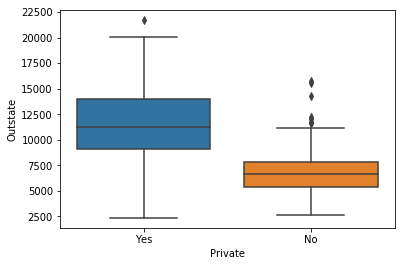

In [6]:
# 8.c.iii produce side-by-side boxplots of Outstate versus Private.
sns.boxplot(x=college.Private, y=college.Outstate)

False    699
True      78
Name: Elite, dtype: int64


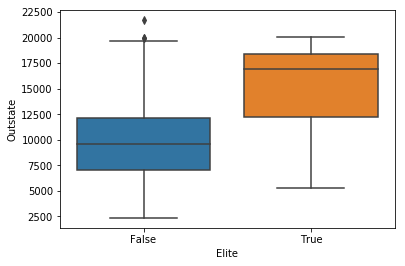

In [7]:
# 8.c.iv
# Create a new qualitative variable, called Elite, by binning the Top10perc variable. 
# We are going to divide universities into two groups based on whether or not the proportion 
# of students coming from the top 10% of their high school classes exceeds 50 %.
# Use the summary() function to see how many elite univer- sities there are. 
# Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.

college['Elite'] = np.where(college.Top10perc > 50, True, False)
print(college.Elite.value_counts())
sns.boxplot(x=college.Elite, y=college.Outstate)

/Users/vishal.gupta/paysense/dashboards/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/vishal.gupta/paysense/dashboards/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/vishal.gupta/paysense/dashboards/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/vishal.gupta/paysense/dashboards/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

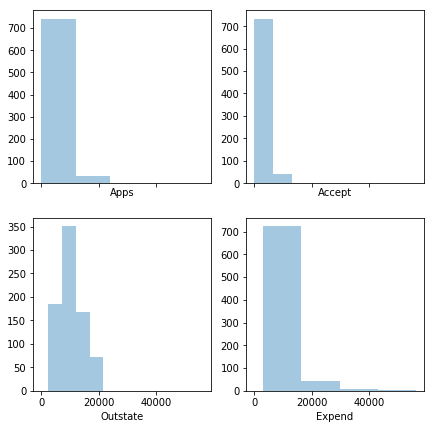

In [8]:
# 8.c.v produce some histograms with differing numbers of bins for a few of the quantitative variables
f, axes = plt.subplots(2,2, figsize=(7,7), sharex=True)
sns.distplot(college.Apps, bins=4, ax=axes[0, 0], kde=False)
sns.distplot(college.Accept, bins=4, ax=axes[0, 1], kde=False)
sns.distplot(college.Outstate, bins=4, ax=axes[1, 0], kde=False)
sns.distplot(college.Expend, bins=4, ax=axes[1, 1], kde=False)

#### 9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data

In [9]:
auto = pd.read_csv('../datasets/Auto.csv')
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [10]:
# clean data
auto = auto[auto.horsepower != '?']
auto.horsepower = auto.horsepower.astype(int)

In [11]:
# (a) Which of the predictors are quantitative, and which are qualitative?

# Quantitative: mpg, cylinders, displacement, horsepower, weight
# Qualitative: name, year, origin

In [12]:
# (b) What is the range of each quantitative predictor
auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']].describe().loc[['min', 'max']]

,mpg,cylinders,displacement,horsepower,weight
min,9.0,3.0,68.0,46.0,1613.0
max,46.6,8.0,455.0,230.0,5140.0


In [13]:
# (c) What is the mean and standard deviation of each quantitative predictor
auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']].describe().loc[['mean', 'std']]

,mpg,cylinders,displacement,horsepower,weight
mean,23.445918,5.471939,194.411990,104.469388,2977.584184
std,7.805007,1.705783,104.644004,38.491160,849.402560


In [23]:
# (d) Now remove the 10th through 85th observations. 
# What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?
auto[~auto.index.isin(range(10,85))].describe().loc[['min', 'max', 'mean', 'std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000
mean,24.338994,5.389937,188.389937,101.235849,2942.506289,15.695597,77.110063,1.597484
std,7.885977,1.662016,100.424205,36.185088,812.971260,2.719850,3.130771,0.818705


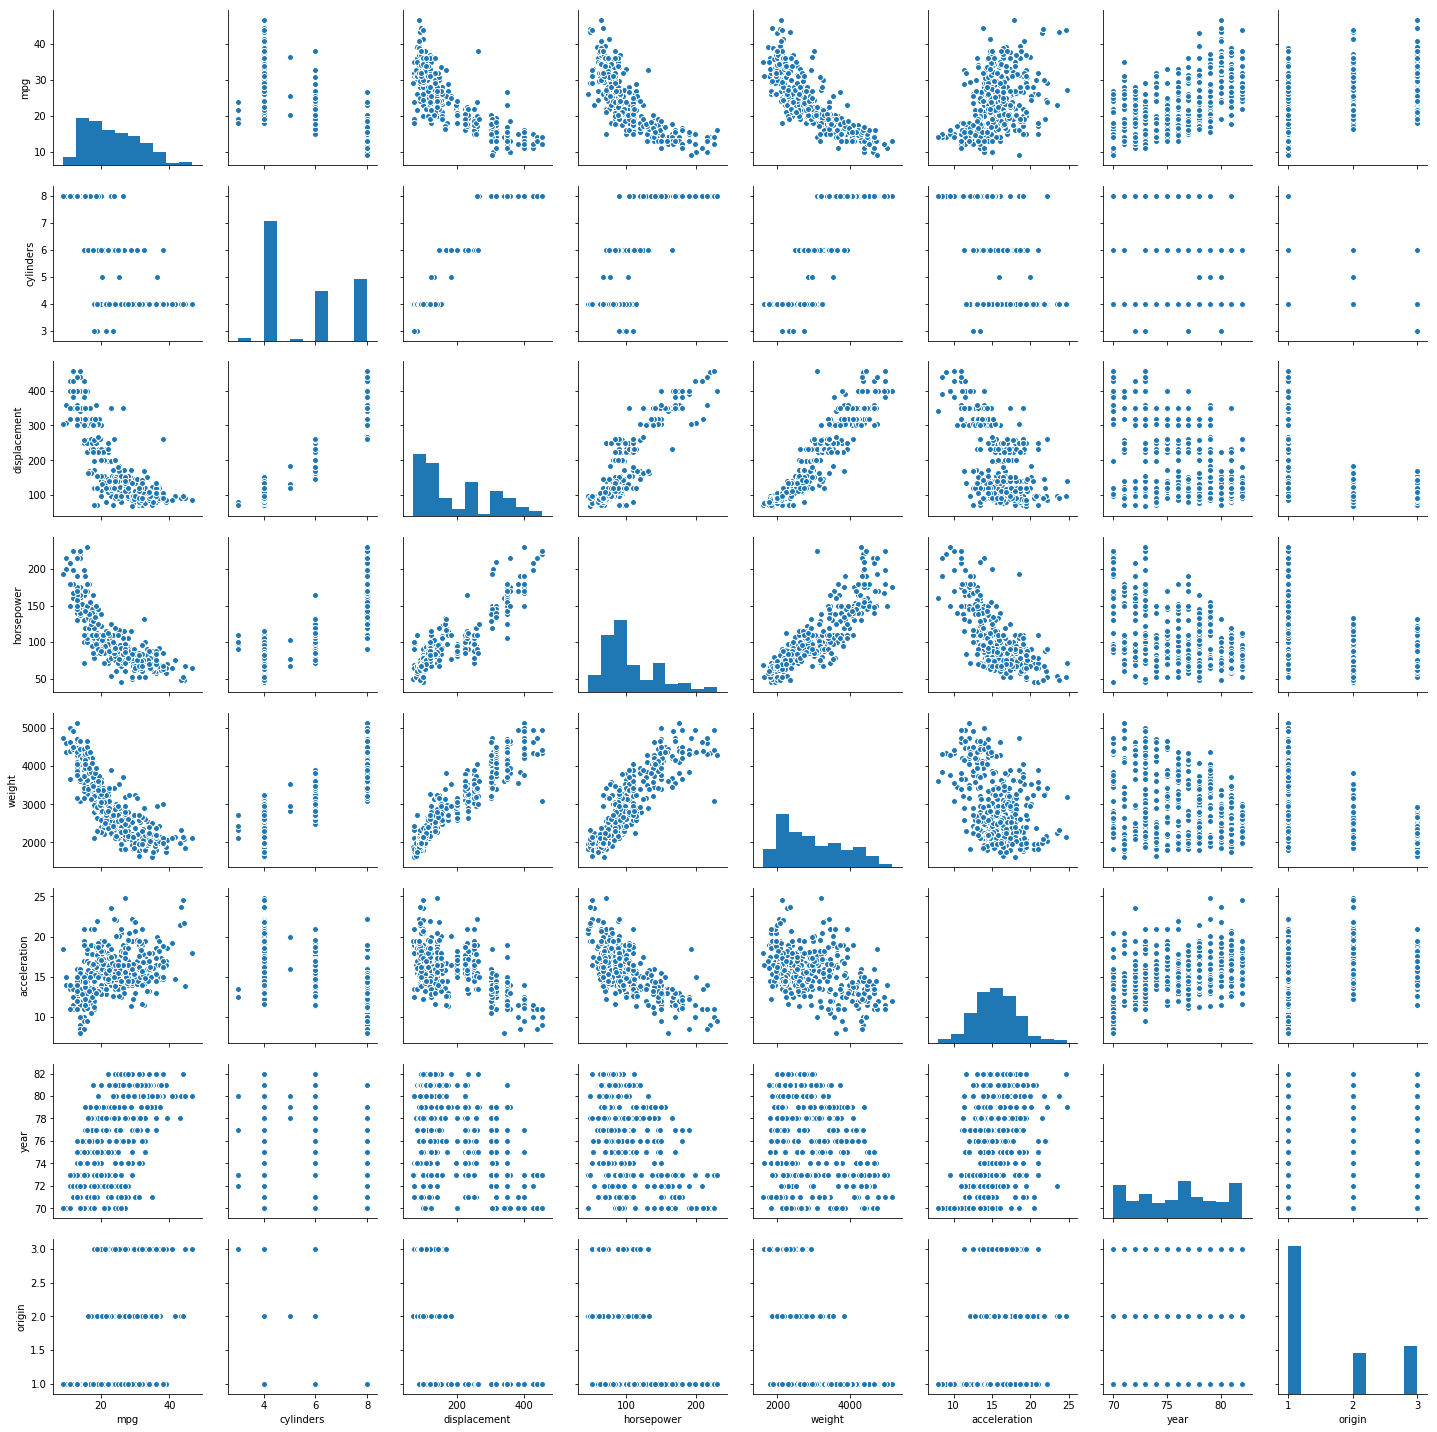

In [24]:
# (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. 
# Create some plots highlighting the relationships among the predictors. Comment on your findings.
sns.pairplot(auto)

Findings:<br>
**Positive correlation between**: Horespower and Displacement, Weight and Displacement  <br>
**Negative correlation between**: Acceleration and horsepower, mpg and horsepower, mpg and weight, mpg and displacement

In [27]:
# (d) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. 
# Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

**Ans:** mpg is negative correlated with horsepower, mpg and weight

### 10. This exercise involves the Boston housing data set

In [30]:
# (a) How many rows are in this data set? How many columns? What do the rows and columns represent?
boston = pd.read_csv('../datasets/BostonHousing.csv')
boston.shape

(506, 14)

Attribute Information (in order):

    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

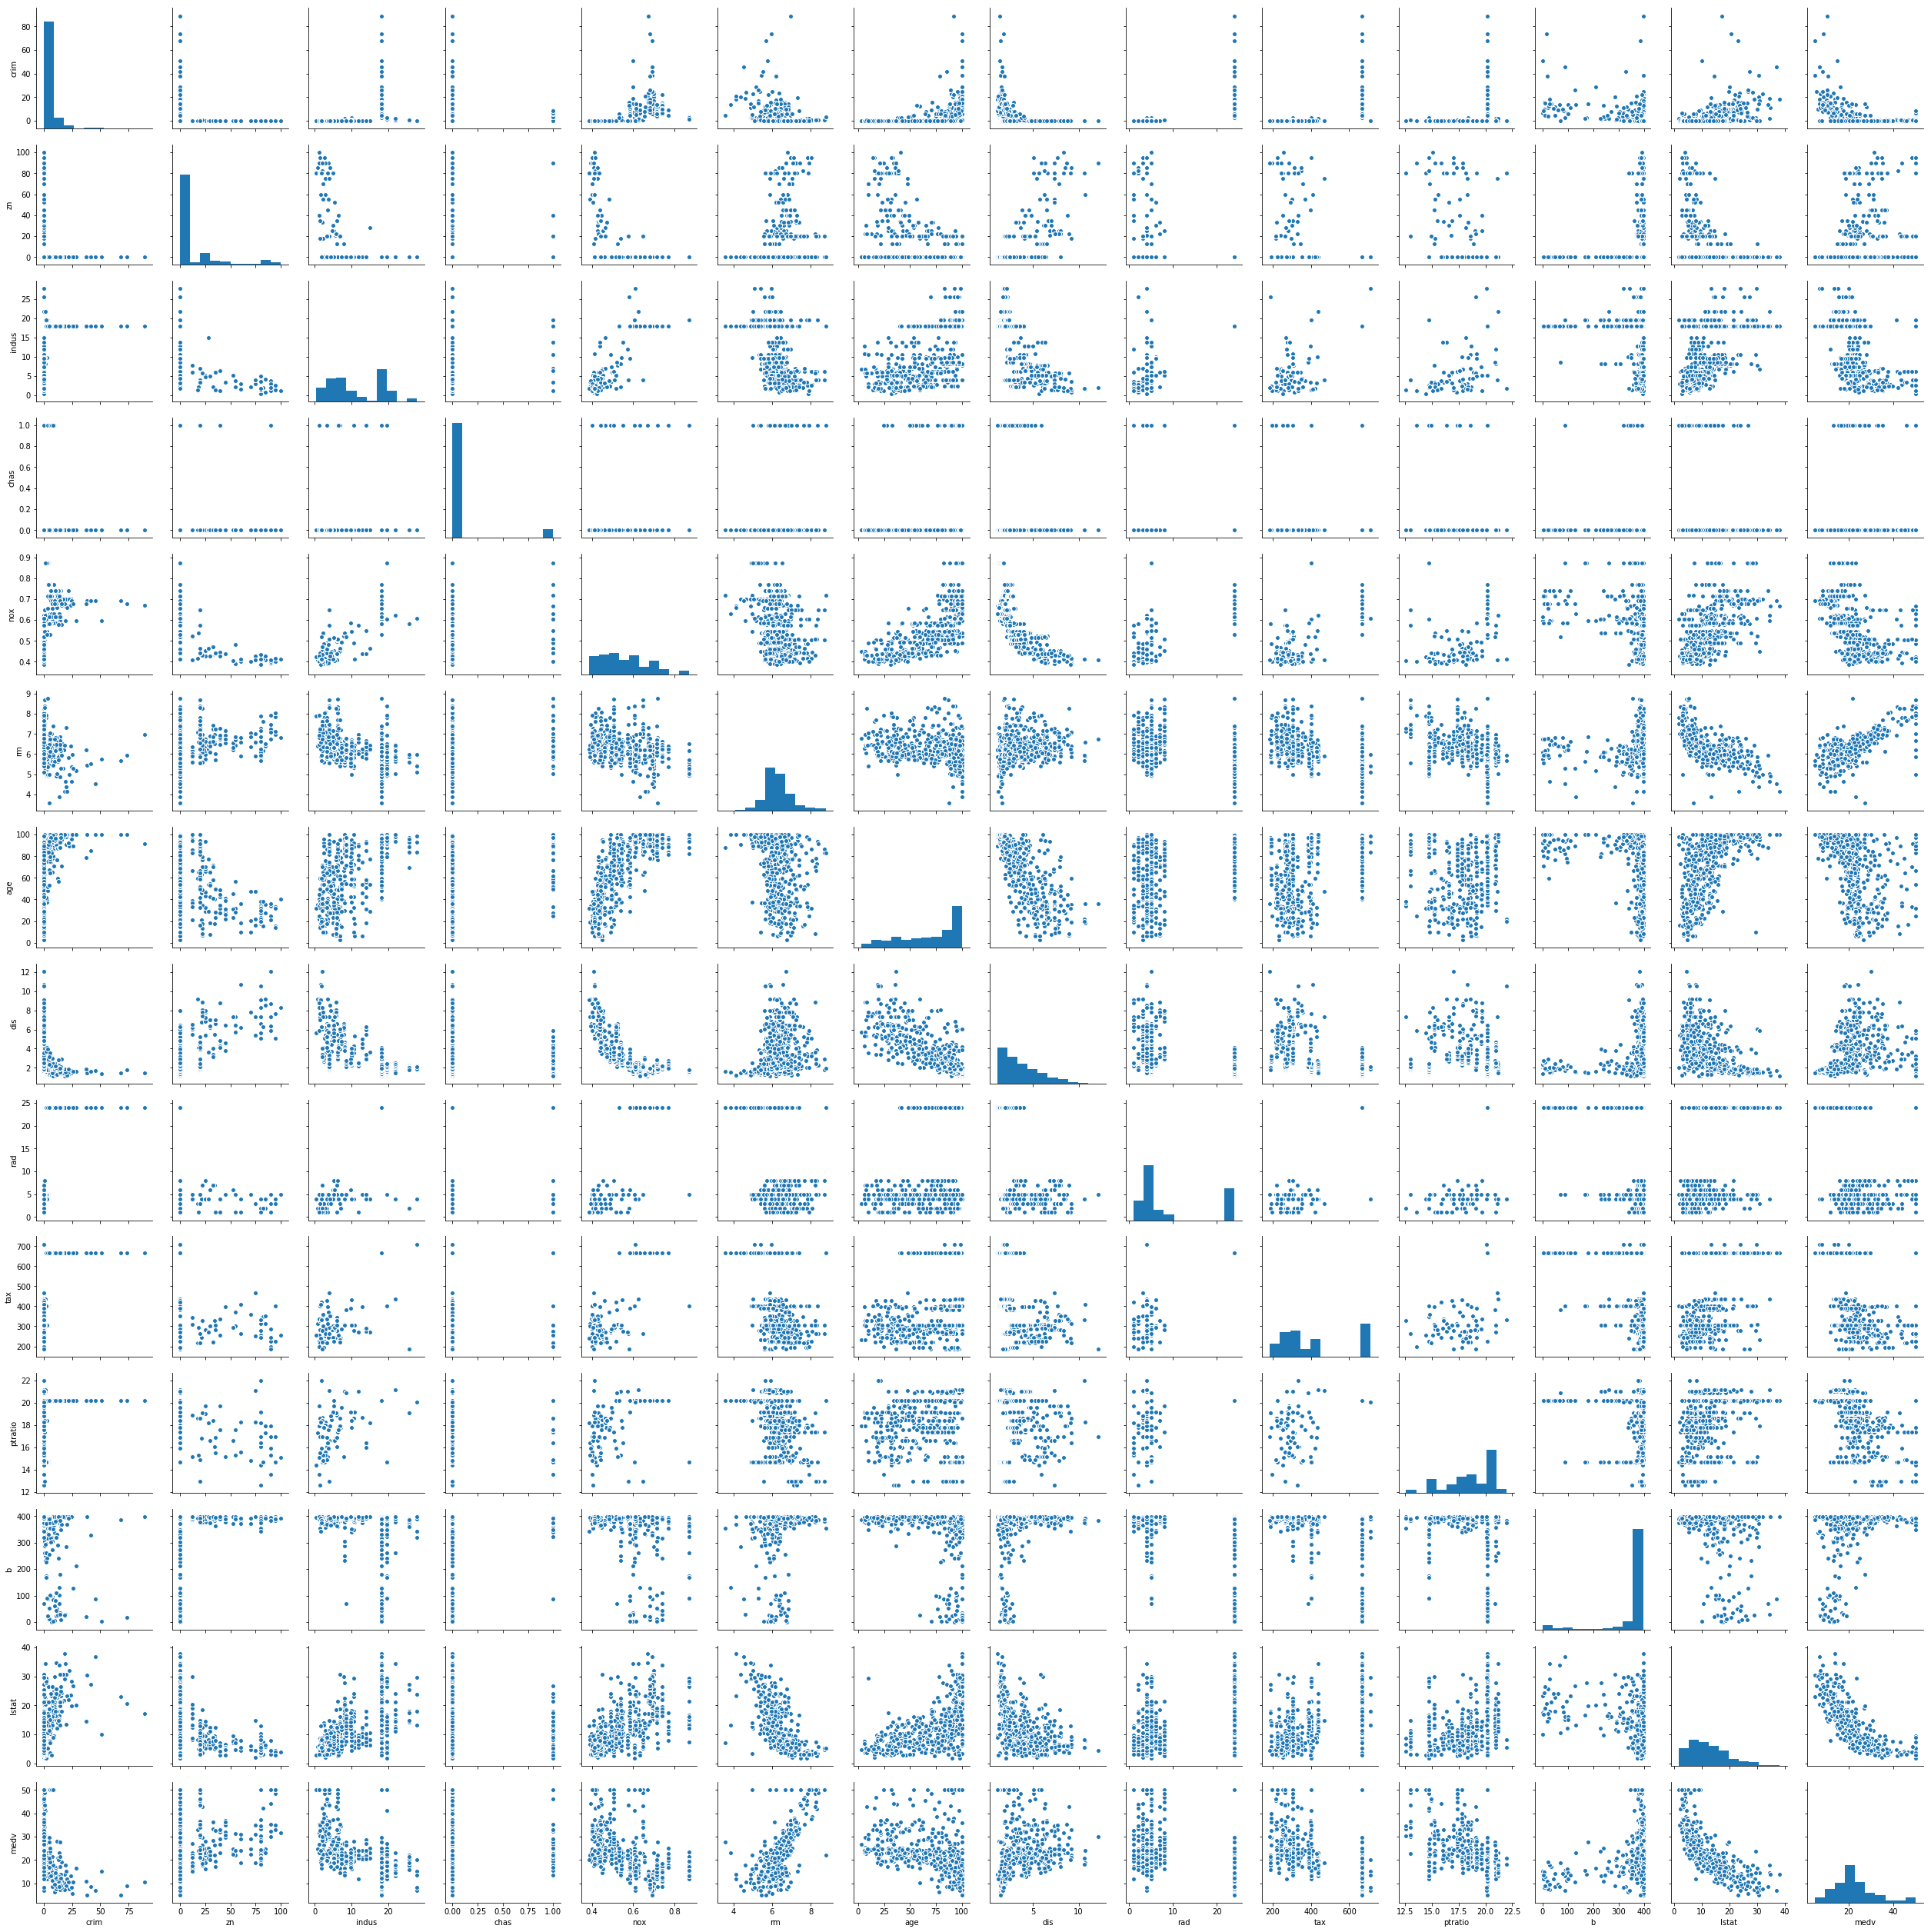

In [33]:
# (b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.
sns.pairplot(boston)

Findings:<br>
NOX is postiviely correlated to DIS<br>
LSTAT and MEDV are negatively correlated<br>

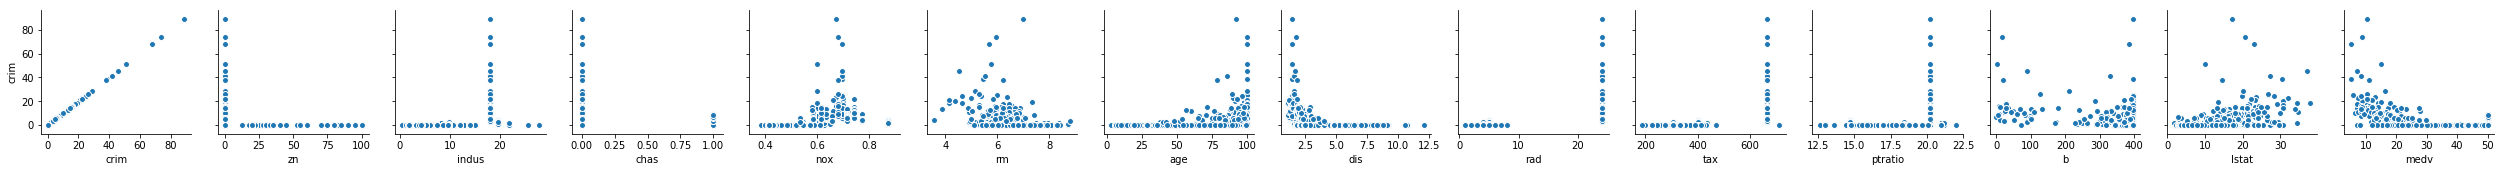

In [40]:
#(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.
sns.pairplot(boston, y_vars= ['crim'], x_vars=boston.columns)

The crime rate per capita increases drastically with age of property<br>
It seems to be very high in houses near areas of employment 

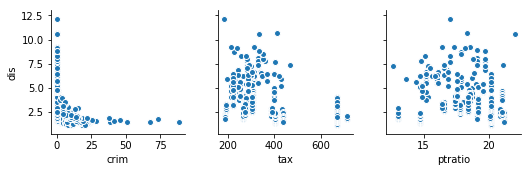

In [41]:
#(d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? 
#Comment on the range of each predictor.
sns.pairplot(boston, y_vars= ['dis'], x_vars=['crim', 'tax', 'ptratio'])

**Suburbs** Crime rate seems to decrease drastically when distance from employment center increases <br>
**Tax Rates** Crime rates looks grouped at the lower end for low tax rates but spread out across for higher tax rates <br>
**Pupli-teacher ratio** Similar as tax rates

In [43]:
#(e) How many of the suburbs in this data set bound the Charles river?
boston[boston.chas == 0].shape[0]

471

In [44]:
#(f) What is the median pupil-teacher ratio among the towns in this data set?
boston.ptratio.median()

19.05

In [54]:
# (g) Which suburb of Boston has lowest median value of owner- occupied homes? 
# What are the values of the other predictors for that suburb, 
# and how do those values compare to the overall ranges for those predictors? Comment on your findings.
boston[boston.medv == boston.medv.min()]#.describe().loc[['min', 'max']]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [55]:
boston.describe().loc[['min', 'max']]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73,5.0
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97,50.0


In [59]:
#(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? 
#More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.
print('>7: {}'.format(boston[boston.rm > 7].shape[0]))
print('>8: {}'.format(boston[boston.rm > 8].shape[0]))

>7: 64
>8: 13


In [61]:
boston[boston.rm > 8].describe().loc['mean']

crim         0.718795
zn          13.615385
indus        7.078462
chas         0.153846
nox          0.539238
rm           8.348538
age         71.538462
dis          3.430192
rad          7.461538
tax        325.076923
ptratio     16.361538
b          385.210769
lstat        4.310000
medv        44.200000
Name: mean, dtype: float64

**Obeservations:**<br>
Crime rate is low<br>
Nox is on lower side <br>
House are larger